In [7]:
import numpy as np

from helpers.physics2dsim_split import * 
from helpers.plotting import *
from helpers.logging import *
from helpers.video import *
from helpers.data import *

In [14]:
# 6 Minutes of simulation time, for 80 seconds of simulation time.

14 Seconds for 300 frames.

For 3000 frames, 140 seconds (2 minutes 10 seconds)
For 8000 frames, 

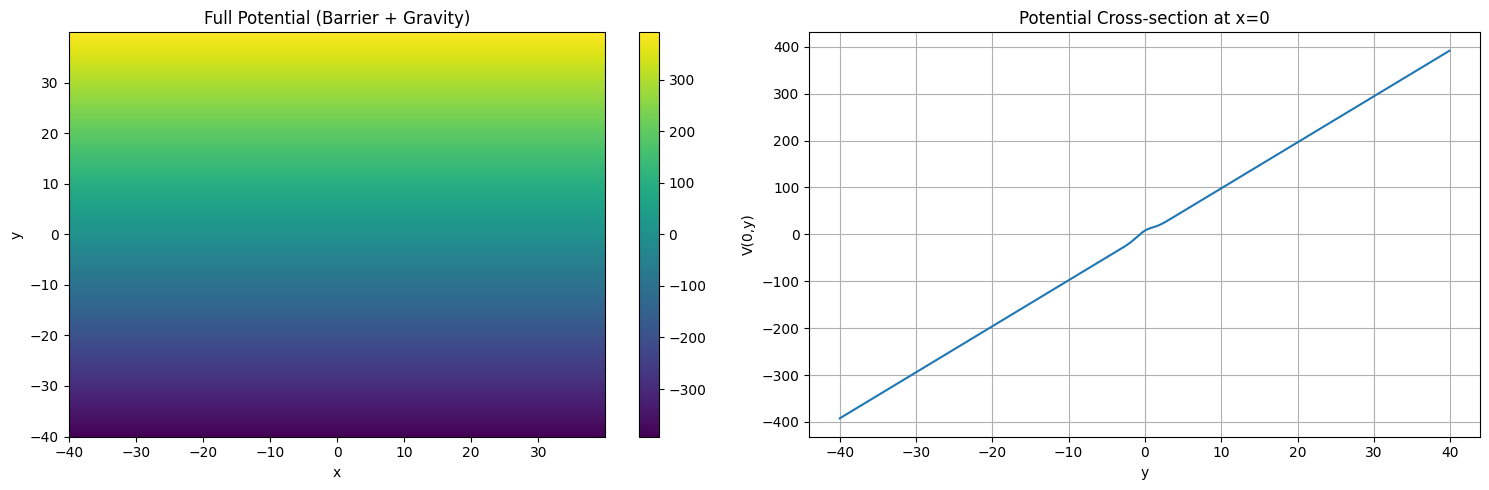

Animation saved as: simulations/20250325_02-40_quantum_evolution_DEBUG.mp4


In [5]:
params = {
	'x_min': -40, 'x_max': 40, 'Nx': 512*2,
	'y_min': -40, 'y_max': 40, 'Ny': 512*2,
	'n_steps': 600, 'dt': 0.01,
	'barrier_center_y': 0, 'barrier_strength': 10,
	'barrier_width': 1,
	'x0': 5, 'y0': 15, 'p0x': 0.0, 'p0y': 0.0
}

simulation_data = simulate_2d_test_2(**params)

# Plot the potential
fig_potential = plot_potential(
	np.array(simulation_data['x']),
	np.array(simulation_data['y']),
	barrier_center_y=params['barrier_center_y'],
	barrier_strength=params['barrier_strength'],
	barrier_width=params['barrier_width'],
)
plt.show()

# Pickle the data
pickle_file = save_simulation_data(simulation_data, params, base_dir='simulations_data/barrier/')
print(f"Data saved to: {pickle_file}")

# Create animation
animation_file = create_animation(simulation_data, output_file=f'simulations/{datetime.datetime.now().strftime("%Y%m%d_%H-%M")}_quantum_evolution_DEBUG.mp4', fps=1/params['dt'])
log_simulation_parameters(animation_file, params)
print(f"Animation saved as: {animation_file}")

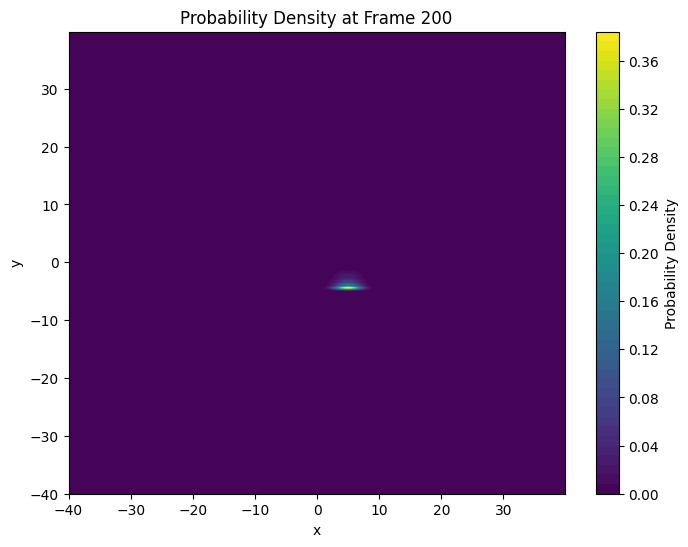

In [34]:
plot_simulation_slice(simulation_data, frame_number=200)

In [20]:
import matplotlib.pyplot as plt

def plot_simulation_slice(simulation_data, frame_number):
    """
    Plots a single slice of the simulation data at the specified frame number.

    Parameters:
    - simulation_data: dict
        The data returned by the simulate_2d_test_2 function.
    - frame_number: int
        The frame number to plot.

    Returns:
    - None
    """
    # Extract data
    prob = simulation_data["prob"][frame_number]

    # Create the plot
    plt.figure(figsize=(8, 6))
    plt.contourf(simulation_data["x"], simulation_data["y"], prob, levels=50, cmap='viridis')
    plt.colorbar(label='Probability Density')
    plt.title(f'Probability Density at Frame {frame_number}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
